In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def confusion_matrix_plot(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

In [3]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')

In [4]:
def box_dist_plot(dataframe, column):
    plt.subplot(1,2,1)
    dataframe.boxplot(column)
    
    plt.subplot(1,2,2)
    sns.distplot(dataframe[column])
    
    plt.tight_layout()

In [5]:
def coef_importance(X_train, model):
    temp = pd.DataFrame(np.std(X_train, 0), columns=['std'])
    temp['coef'] = model.coef_[0].tolist()
    temp['weight'] = temp['std']*temp['coef']
    temp_sort = temp.sort_values('weight', ascending=False)['weight']
    plt.bar(temp_sort.index, temp_sort)
    plt.xticks(rotation=90)


# dataset

In [6]:
df = pd.read_csv('merge_test1.csv')

In [7]:
# drop extra col
df = df.drop('Unnamed: 0', axis=1)

In [8]:
pd.set_option('display.max_columns', 40)
df.head()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 12th pass,education_Class 9th or below,education_Graduate,education_ITI / Diploma,education_No education,education_not provided,bikeSurvey_Yes,bikeSurvey_not provided,idDetected_True,drivingLicenseSurvey_Yes,drivingLicenseSurvey_not provided,married_Yes,married_not provided,city_Bangalore,city_Delhi/NCR,city_others,city_your city,title_South Delhi,title_Vastrapur,title_West Delhi (Janakpuri),title_others,source_Referrals,source_WhatsApp OptIn Form,source_not provided,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
0,25.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,4238,149,57,92,4.504703e+05,34.3415
1,20.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,2746,156,58,98,3.035038e+05,25.9330
2,24.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3722,92,33,59,3.426029e+05,16.8930
3,22.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3617,97,35,62,9.442864e+05,20.0390
4,19.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,2689,83,30,53,1.033980e+06,11.8200


In [9]:
df.describe()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 12th pass,education_Class 9th or below,education_Graduate,education_ITI / Diploma,education_No education,education_not provided,bikeSurvey_Yes,bikeSurvey_not provided,idDetected_True,drivingLicenseSurvey_Yes,drivingLicenseSurvey_not provided,married_Yes,married_not provided,city_Bangalore,city_Delhi/NCR,city_others,city_your city,title_South Delhi,title_Vastrapur,title_West Delhi (Janakpuri),title_others,source_Referrals,source_WhatsApp OptIn Form,source_not provided,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
count,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.00000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,1.053400e+04,10534.000000
mean,29.211885,0.003892,0.030473,0.057148,0.043858,0.190906,0.640782,0.114012,0.006740,0.067875,0.033416,0.061135,0.637650,0.758117,0.074805,0.898994,0.660623,0.256123,0.067211,0.649421,0.078792,0.223467,0.385798,0.081071,0.052022,0.230871,0.051832,0.59626,0.662996,0.011961,0.000285,0.286121,352.277767,60.832637,22.136985,38.695652,3.725202e+04,25.148520
std,10.875285,0.062269,0.171892,0.232137,0.204789,0.393034,0.479794,0.317841,0.081825,0.251544,0.179728,0.239590,0.480702,0.428244,0.263090,0.301351,0.473520,0.436511,0.250399,0.477174,0.269427,0.416588,0.486806,0.272957,0.222082,0.421410,0.221699,0.49067,0.472709,0.108717,0.016874,0.451968,718.006987,83.476012,32.879492,51.144904,1.371072e+05,685.040020
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000,16.000000,1.321667e+00,0.253000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,37.000000,13.000000,24.000000,1.189769e+01,5.474375
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,184.000000,45.000000,16.000000,29.000000,4.232757e+01,10.955750
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,242.000000,61.000000,22.000000,39.000000,1.786800e+04,23.165750
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,4944.000000,5319.000000,1872.000000,3447.000000,3.519348e+06,69527.473500


In [10]:
X = df.drop('label', axis=1)
y = df['label']

In [16]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

### Visualization

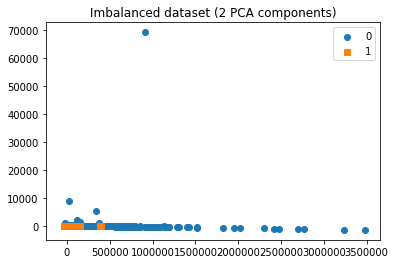

In [13]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

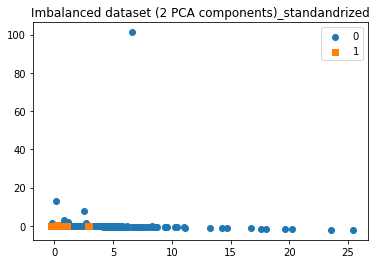

In [17]:
pca = PCA(n_components=2)
X_std = pca.fit_transform(X_std)

plot_2d_space(X_std, y, 'Imbalanced dataset (2 PCA components)_standandrized')

# correlation

In [19]:
cor = df.corr()

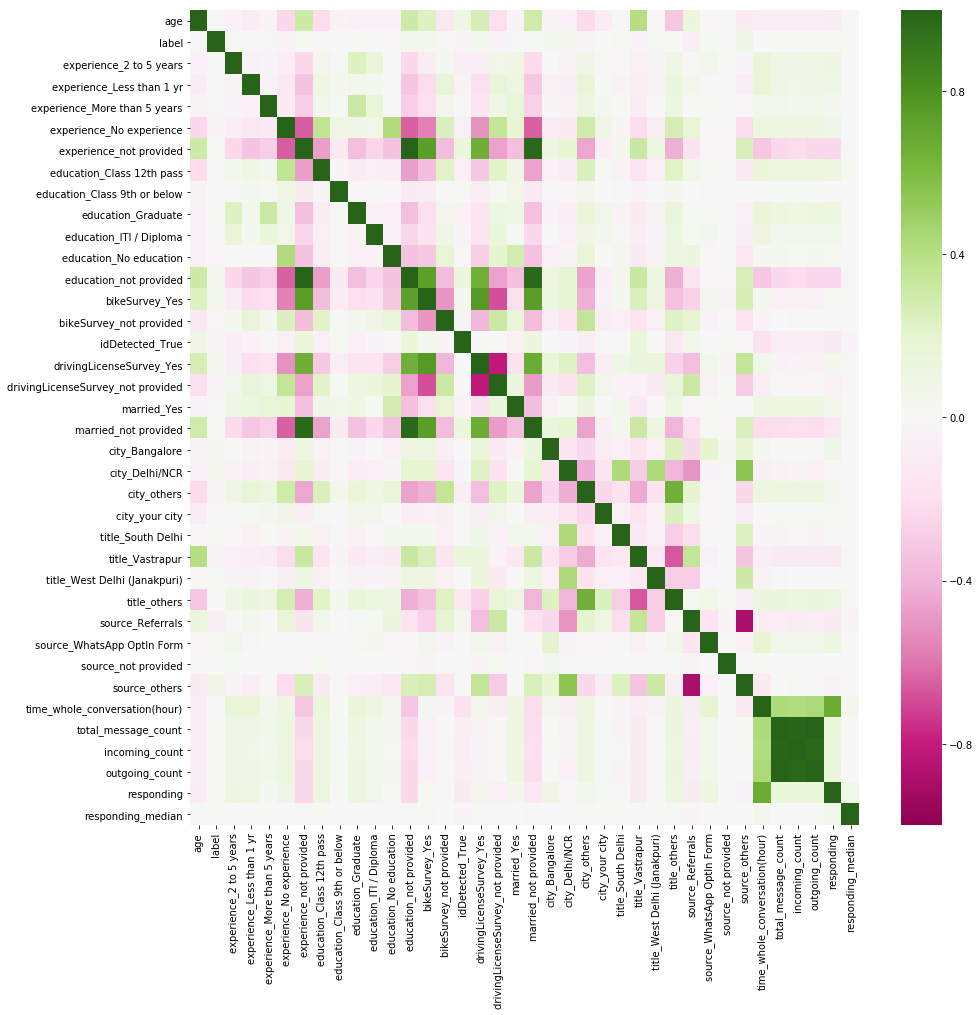

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='PiYG', vmax=1, vmin=-1)

In [ ]:
# total_message_count, incoming_count, and outgoing_count are highly related

In [25]:
df.shape

(10534, 38)

# Remove some outliers and columns with high correlation

In [21]:
df_cluster = df.copy()


In [22]:
df_cluster.drop(['total_message_count', 'outgoing_count'], axis=1, inplace=True)

In [23]:
# Outliers
df_cluster = df_cluster[(df_cluster['responding_median']<500) & (df_cluster['responding']<200000) & (df_cluster['time_whole_conversation(hour)']<1000)]


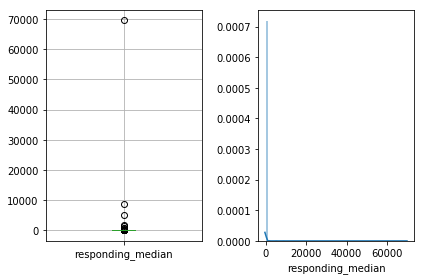

In [26]:
# Before
box_dist_plot(df,'responding_median')


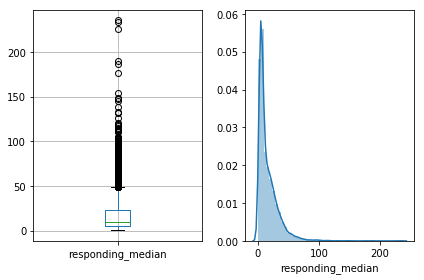

In [27]:
# After
box_dist_plot(df_cluster,'responding_median')

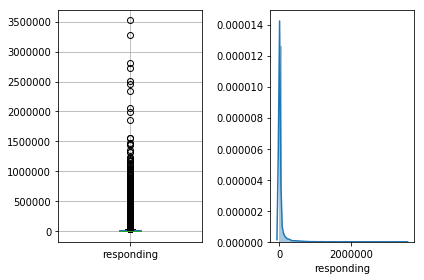

In [28]:
# Before
box_dist_plot(df,'responding')

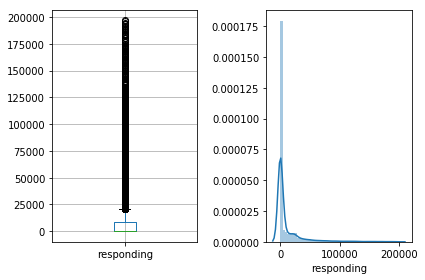

In [29]:
# After
box_dist_plot(df_cluster,'responding')

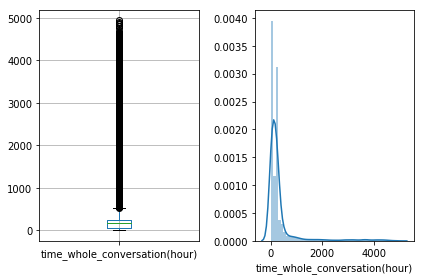

In [30]:
# Before
box_dist_plot(df,'time_whole_conversation(hour)')

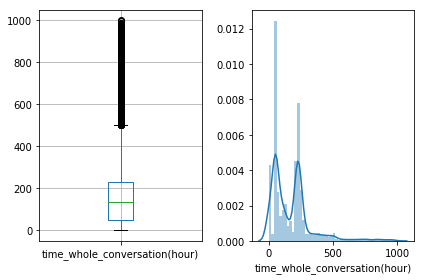

In [31]:
# After
box_dist_plot(df_cluster,'time_whole_conversation(hour)')

In [266]:
X = df_cluster.drop('label', axis=1)
y = df_cluster['label']

Text(0.5, 1.0, 'Imbalanced dataset')

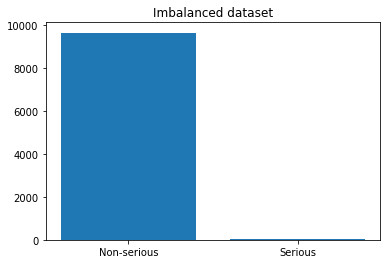

In [33]:
plt.bar(range(2),[y.value_counts()[0],y.value_counts()[1]])
plt.xticks([0,1],['Non-serious','Serious'])
plt.title('Imbalanced dataset')
#plt.savefig('Imbalanced dataset.png')

In [34]:
df_cluster.shape


(9694, 36)

### visulaizaiton

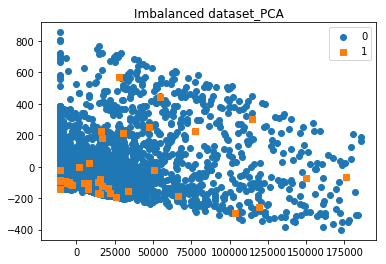

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Imbalanced dataset_PCA')
#plt.savefig('Imbalanced dataset_PCA.png')

### visualization_std

In [36]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

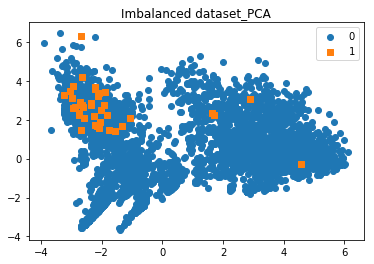

In [287]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plot_2d_space(X_pca, y, 'Imbalanced dataset_PCA')
plt.savefig('Imbalanced dataset_std_PCA.png')

# [Manual Under-sampling] by clustering

In [38]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import numpy as np

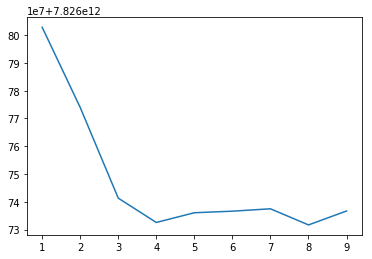

In [39]:
from sklearn.cluster import KMeans
# Choosing the optimal k
k_range = range(1,10)
# Try clustering the data for k values ranging 1 to 10
k_means_var = [KMeans(n_clusters = k).fit(X_std) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Calculate within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Visualize the elbow method for determining k
import matplotlib.pyplot as plt
plt.plot(k_range, wcss)
plt.show()

### 2 clusters

In [40]:
k2 = centroids[1]

In [41]:
k2

array([[-0.4356854 ,  0.33852126,  0.49164158,  0.44141026,  1.00148771,
        -1.46779961,  0.71038807,  0.17635182,  0.52923114,  0.37477817,
         0.53759574, -1.46256126, -1.20542743,  0.60671618, -0.14770293,
        -1.08910184,  0.7911899 ,  0.54678001, -1.46604395, -0.18685434,
        -0.27308666,  0.67434933,  0.14220829, -0.08111887, -0.46341462,
        -0.16542107,  0.59948111,  0.31879222, -0.06362372,  0.03836381,
        -0.35644134,  0.11992188,  0.37694501,  0.1350024 , -0.15430663],
       [ 0.19981479, -0.15525321, -0.22547751, -0.20244034, -0.45930402,
         0.67316479, -0.3257994 , -0.08087878, -0.2427169 , -0.17188141,
        -0.24655309,  0.67076237,  0.55283521, -0.27825322,  0.06773977,
         0.49948577, -0.36285688, -0.25076519,  0.67235961,  0.08569546,
         0.12524348, -0.30927125, -0.06521981,  0.03720288,  0.21253201,
         0.0758657 , -0.27493506, -0.14620504,  0.02917922, -0.01759448,
         0.16347174, -0.05499878, -0.17287517, -0.

In [42]:
pca = PCA(n_components=2)
k2 = pca.fit_transform(k2)

In [43]:
k2

array([[-2.82567912e+00,  8.19002618e-17],
       [ 2.82567912e+00,  8.19002618e-17]])

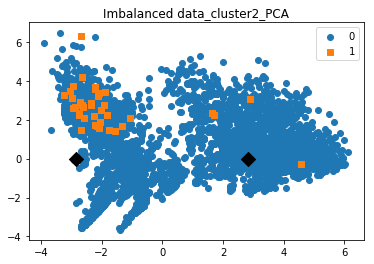

In [51]:
plot_2d_space(X_pca, y, 'Imbalanced data_cluster2_PCA')
plt.scatter([k2[0][0], k2[1][0]], [k2[0][1], k2[1][1]], c='black', marker='D', s=100 )
#plt.savefig('Imbalanced data_cluster2_PCA.png')

In [48]:
pca = PCA(n_components=2)
k3 = pca.fit_transform(centroids[2])

In [49]:
k3

array([[ 3.7956798 , -0.457797  ],
       [-1.23749166,  2.20246041],
       [-2.55818813, -1.74466341]])

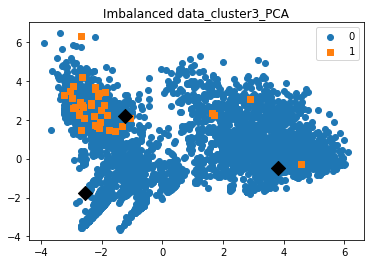

In [52]:
plot_2d_space(X_pca, y, 'Imbalanced data_cluster3_PCA')
plt.scatter([k3[0][0], k3[1][0], k3[2][0]], [k3[0][1], k3[1][1], k3[2][1]], c='black', marker='D', s=100 )
#plt.savefig('Imbalanced data_cluster3_PCA.png')

# [Uunder-sampling]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

### CC visualization

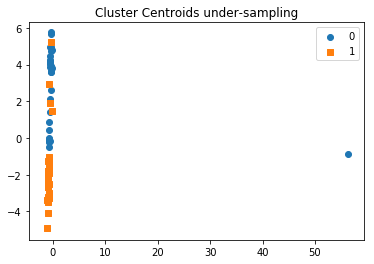

In [58]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans

cc = ClusterCentroids(sampling_strategy='majority', estimator=KMeans(n_clusters=2), random_state=42)
X_cc, y_cc = cc.fit_resample(X_std, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')
#plt.savefig('ClusterCentroids.png')

### CC visualization_find outliers and remove it

In [61]:
for i in range(len(X_pca)):
    if X_pca[i][0]>10:
        print(i)

13


In [72]:
X_pca_removeoutlier = X_pca.tolist()

In [73]:
del X_pca_removeoutlier[13]

In [77]:
X_pca_removeoutlier = np.array(X_pca_removeoutlier)

In [80]:
y_cc_removeoutlier = y_cc.tolist()

In [81]:
del y_cc_removeoutlier[13]

In [82]:
y_cc_removeoutlier = np.array(y_cc_removeoutlier)

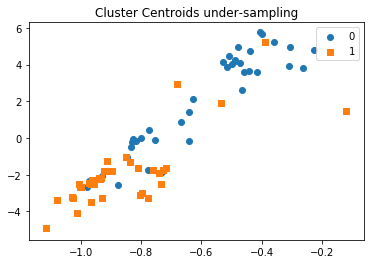

In [85]:
plot_2d_space(X_pca_removeoutlier, y_cc_removeoutlier, 'Cluster Centroids under-sampling')
#plt.savefig('ClusterCentroids_std_PCA.png')

Text(0.5, 1.0, 'Balanced dataset after under-sampling')

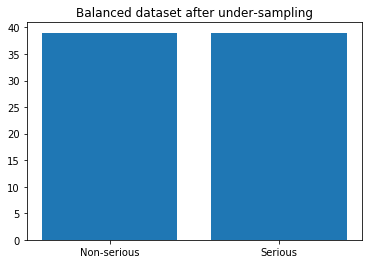

In [86]:
plt.bar(range(2),[39, 39])
plt.xticks([0,1],['Non-serious','Serious'])
plt.title('Balanced dataset after under-sampling')
#plt.savefig('Balanced dataset after under-sampling.png')

### CNN visualization

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sampling_strategy='majority')
X_cnn, y_cnn = cnn.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cnn)
plot_2d_space(X_pca, y_cnn, 'CNN under-sampling')

### ENN visualization

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_enn, y_enn = enn.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_enn)
plot_2d_space(X_pca, y_enn, 'ENN under-sampling')

### IHT visualization

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold()
X_iht, y_iht = iht.fit_resample(X,y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iht)
plot_2d_space(X_pca, y_iht, 'IHT under-sampling')

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Validation
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [95]:
def roc_plot(y_test, y_pred_prob, title):
    from sklearn.metrics import roc_curve
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)

# Train test split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=4, stratify=y)

### training data + visualization

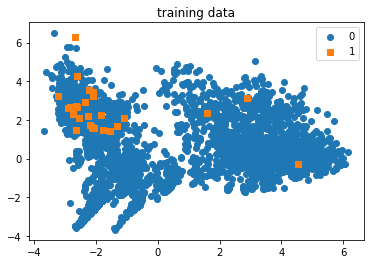

In [90]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plot_2d_space(X_pca, y_train, 'training data')

### testing data + visualization

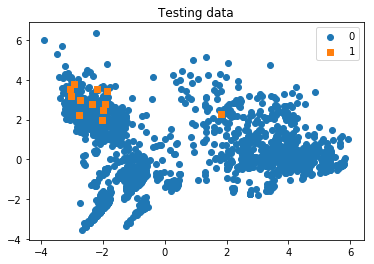

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plot_2d_space(X_pca, y_test, 'Testing data')

# KNN

In [300]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [308]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [309]:
confusion_matrix(y_test, y_pred)

array([[2897,    0],
       [  12,    0]])

Confusion matrix:
 [[2897    0]
 [  12    0]]


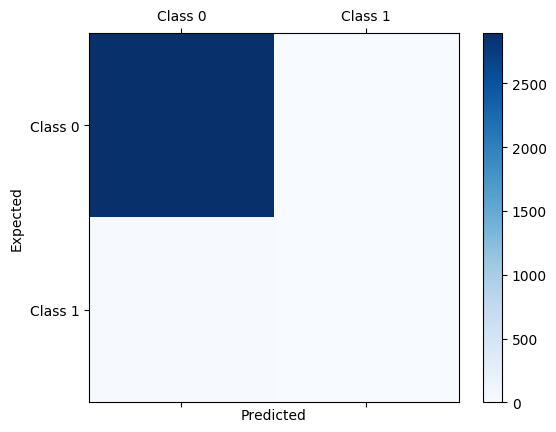

In [320]:
confusion_matrix_plot(y_test, y_pred)

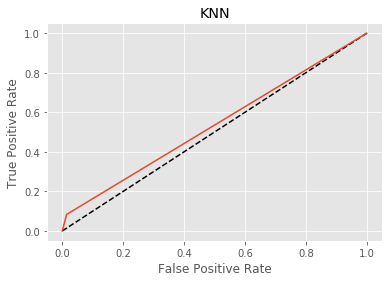

In [310]:
roc_plot(y_test, y_pred_prob, 'KNN')
#plt.savefig('KNN.png')



In [313]:
list(y_pred_prob)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

# XGboost

In [304]:
xgbrt = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
xgbrt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [314]:
y_pred = xgbrt.predict(X_test)
y_pred_prob = xgbrt.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))

[[2897    0]
 [  12    0]]


Confusion matrix:
 [[2897    0]
 [  12    0]]


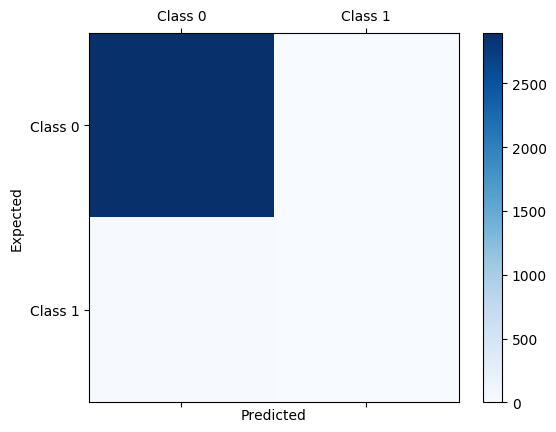

In [317]:
confusion_matrix_plot(y_test, y_pred)

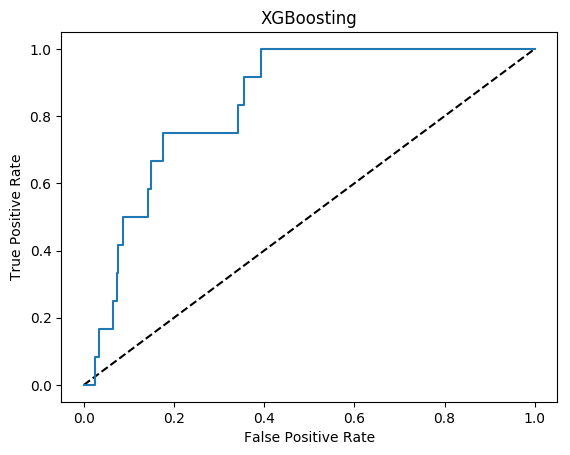

In [318]:
roc_plot(y_test, y_pred_prob, 'XGBoosting')
plt.savefig('xg.png')


In [319]:
list(y_pred_prob)

[0.00012527933,
 0.033922642,
 0.00016466521,
 0.00020301096,
 0.00065266533,
 2.3067692e-05,
 8.104303e-05,
 0.0016287885,
 0.00011113505,
 0.00012568147,
 6.214987e-05,
 2.688064e-05,
 0.0009481433,
 0.0001689473,
 0.00012095086,
 0.00038588716,
 8.464702e-05,
 0.00073849154,
 0.000295897,
 0.0029532518,
 0.00010617342,
 0.00076286297,
 4.8289523e-05,
 0.0022632375,
 3.084347e-05,
 0.0001381804,
 0.0012499737,
 4.8870457e-05,
 3.1990137e-05,
 8.54584e-05,
 0.015819423,
 0.0003301817,
 0.0025529454,
 0.00015076208,
 2.2995979e-05,
 0.001929933,
 3.2047512e-05,
 8.933162e-05,
 0.00010809057,
 0.00010389087,
 7.9670426e-05,
 0.00020731441,
 1.9175875e-05,
 0.015964843,
 7.572648e-05,
 0.00015443758,
 0.001580739,
 0.0030763217,
 0.0030275225,
 0.00016573572,
 0.00014062473,
 3.547544e-05,
 0.0044363085,
 0.00043756812,
 3.2047512e-05,
 3.9534585e-05,
 0.0003096065,
 2.2720316e-05,
 8.933162e-05,
 0.0030599588,
 0.0030870978,
 0.00013794411,
 2.8823895e-05,
 0.0011273432,
 5.6197023e-05,

# KNN (w/ under-sampling)

### Under-sampling training data + visualization

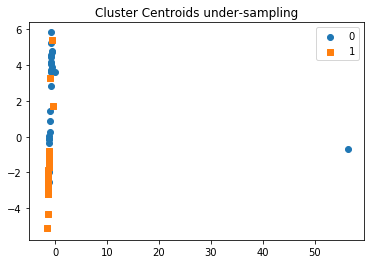

In [99]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='majority', estimator=KMeans(n_clusters=2))
X_cc, y_cc = cc.fit_resample(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')

In [100]:
X_cc_removeoutlier = X_cc.tolist()

In [106]:
del X_cc_removeoutlier[16]

In [107]:
X_cc_removeoutlier = np.array(X_cc_removeoutlier)

In [110]:
y_cc_removeoutlier = y_cc.tolist()

In [111]:
del y_cc_removeoutlier[16]

In [112]:
y_cc_removeoutlier = np.array(y_cc_removeoutlier)

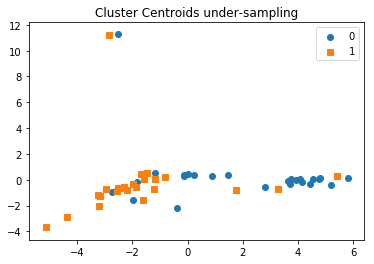

In [113]:
plot_2d_space(pca.fit_transform(X_cc_removeoutlier), y_cc_removeoutlier, 'Cluster Centroids under-sampling')

In [114]:
for i in np.arange(1, 11, 1):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_cc_removeoutlier, y_cc_removeoutlier)
    y_pred = knn.predict(X_test)
    print(confusion_matrix(y_test, y_pred))

[[2362  535]
 [   4    8]]
[[2640  257]
 [   9    3]]
[[2061  836]
 [   1   11]]
[[2199  698]
 [   1   11]]
[[2029  868]
 [   1   11]]
[[2121  776]
 [   2   10]]
[[2057  840]
 [   0   12]]
[[2104  793]
 [   1   11]]
[[2071  826]
 [   1   11]]
[[2105  792]
 [   1   11]]


In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_cc_removeoutlier, y_cc_removeoutlier)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [321]:
import pickle
pickle.dump(knn, open('knn_for_flask_2.pickle', 'wb'), protocol=2)

In [134]:
y_knn_pred = knn.predict(X_test)
y_knn_pred_prob = knn.predict_proba(X_test)[:,1]

In [136]:
print(confusion_matrix(y_test, y_knn_pred))

[[2061  836]
 [   1   11]]


Confusion matrix:
 [[2061  836]
 [   1   11]]


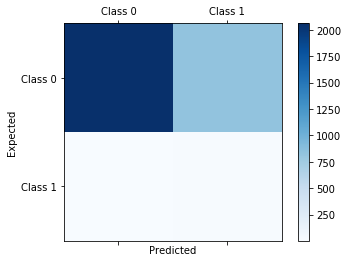

In [137]:
confusion_matrix_plot(y_test, y_knn_pred)

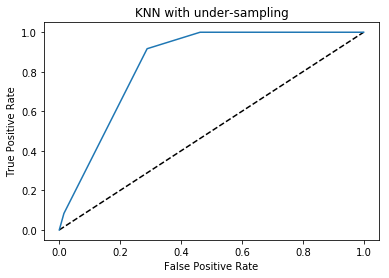

In [123]:
roc_plot(y_test, y_pred_prob, 'KNN with under-sampling')
#plt.savefig('KNN with under-sampling.png')



# Gradient boosting (w/ under-sampling)

In [ ]:
gbrt=GradientBoostingClassifier(random_state=1, n_estimators=100)
gbrt.fit(X_train_std, y_cc)

In [ ]:
y_pred = gbrt.predict(X_test_std)
y_pred_prob = gbrt.predict_proba(X_test_std)[:,1]
print(confusion_matrix(y_test, y_pred))

In [ ]:
roc_plot(y_test, y_pred_prob, 'GradientBoosting with under-sampling')
#plt.savefig('KNN with under-sampling.png')



# XGboost (w/ under-sampling)

In [125]:
xgbrt = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
xgbrt.fit(X_cc_removeoutlier, y_cc_removeoutlier)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [129]:
y_xg_pred = xgbrt.predict(X_test)
y_xg_pred_prob = xgbrt.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_xg_pred))

[[ 211 2686]
 [   0   12]]


Confusion matrix:
 [[ 211 2686]
 [   0   12]]


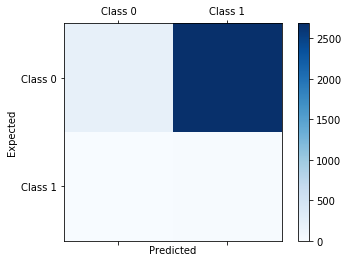

<Figure size 432x288 with 0 Axes>

In [132]:
confusion_matrix_plot(y_test, y_xg_pred)

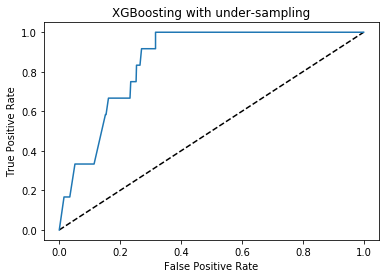

In [133]:
roc_plot(y_test, y_xg_pred_prob, 'XGBoosting with under-sampling')
plt.savefig('xg with under-sampling.png')


# Simulation

### calculate distance between each data point and these two centers in the orginal dataset

In [201]:
dist_toX = cdist(pca.fit_transform(X_std), pca.fit_transform(centroids[1]), 'euclidean')

In [202]:
dist_toX

array([[8.46687114, 2.81771652],
       [4.84650384, 1.44014449],
       [4.06683813, 1.87311799],
       ...,
       [1.37779371, 4.75525935],
       [2.54412767, 4.25654485],
       [1.8952061 , 4.34933673]])

In [210]:
dist_toX_label = pd.DataFrame({'dist1': [i[0] for i in dist_toX], 'dist2':[t[1] for t in dist_toX], 'label': y})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1217f7da0>]],
      dtype=object)

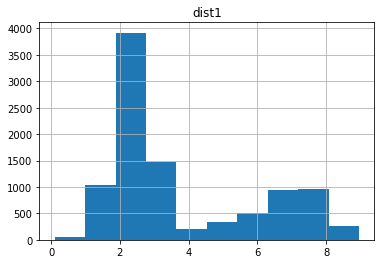

In [211]:
dist_toX_label.hist('dist1')

In [212]:
for i in dist_toX_label.index:
    if dist_toX_label.loc[i, 'dist1'] < 3:
        dist_toX_label.loc[i, 'label'] = 1

In [213]:
dist_toX_label.label.value_counts()

1    5495
0    4199
Name: label, dtype: int64

In [214]:
X_select = dist_toX_label.drop('label', axis=1)
y_select = dist_toX_label['label']

### Simulation

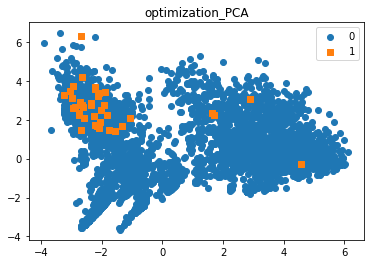

In [216]:
plot_2d_space(pca.fit_transform(X_std), y, 'optimization_PCA')
#plt.savefig('optimization_PCA.png')

In [222]:
temp = pca.fit_transform(X_std)

In [224]:
temp_list = [i for i in range(len(temp)) if temp[i][0] < 0]

In [273]:
X_std_simulated = pd.DataFrame(X_std.copy()).reset_index(drop=True)
y_simulated = y.copy().reset_index(drop=True)

In [275]:
for i in temp_list:
    y_simulated[i] = 1

In [277]:
y_simulated.value_counts()

1    6419
0    3275
Name: label, dtype: int64

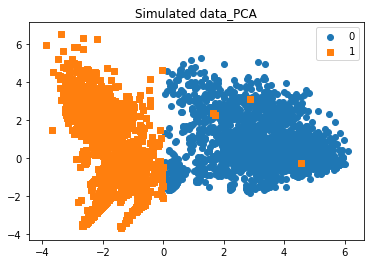

In [279]:
plot_2d_space(pca.fit_transform(X_std_simulated), y_simulated, 'Simulated data_PCA')
#plt.savefig('Simulated data_PCA')

### train test split

In [280]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_std_simulated, y_simulated, test_size=0.3, random_state=6, stratify=y_simulated)

### KNN

In [282]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_train_s, y_train_s)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [283]:
y_pred = knn.predict(X_test_s)
y_pred_prob = knn.predict_proba(X_test_s)[:,1]

In [284]:
confusion_matrix(y_test_s, y_pred)

array([[ 978,    5],
       [   5, 1921]])

Text(0.5, 1.0, 'ROC Curve')

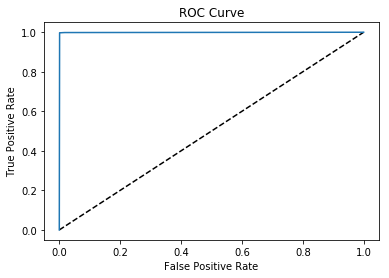

In [286]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_s, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [ ]:
for i in np.arange(1, 11, 1):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train_s_std, y_train_s)
    y_pred = knn.predict(X_test_s_std)
    print(confusion_matrix(y_test_s, y_pred))

In [ ]:
print(classification_report(y_test_s, y_pred, target_names=['nothired', 'hired']))


# SVm

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, probability=True, random_state=1)
svm.fit(X_train_s_std, y_train_s)
y_pred = svm.predict(X_test_s_std)

In [ ]:
confusion_matrix(y_test_s, y_pred)

In [ ]:
print(classification_report(y_test_s, y_pred, target_names=['nothired', 'hired']))

In [ ]:
for i in np.arange(-1, 4):
    svm = SVC(kernel='linear', C=10.**i, probability=True, random_state=1)
    svm.fit(X_train_s_std, y_train_s)
    y_pred = svm.predict(X_test_s_std)
    print(confusion_matrix(y_test_s, y_pred))

In [ ]:
y_pred_prob = svm.predict_proba(X_test_s_std)[:,1]

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_s, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


In [ ]:
def plot_coefficients(classifier, feature_names, top_features=5):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    
    plt.bar(np.arange(2 * top_features), coef[top_coefficients])
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=90, )
    plt.ylabel('Coefficient')
    plt.xlabel('Feature')

In [ ]:
plot_coefficients(svm, X.columns)

### RF

In [288]:
RF = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1)
RF.fit(X_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [289]:
y_pred = RF.predict(X_test_s)
y_pred_prob = RF.predict_proba(X_test_s)[:,1]

In [290]:
confusion_matrix(y_test_s, y_pred)

array([[ 981,    2],
       [   3, 1923]])

In [291]:
print(classification_report(y_test_s, y_pred, target_names=['nothired', 'hired']))

              precision    recall  f1-score   support

    nothired       1.00      1.00      1.00       983
       hired       1.00      1.00      1.00      1926

    accuracy                           1.00      2909
   macro avg       1.00      1.00      1.00      2909
weighted avg       1.00      1.00      1.00      2909



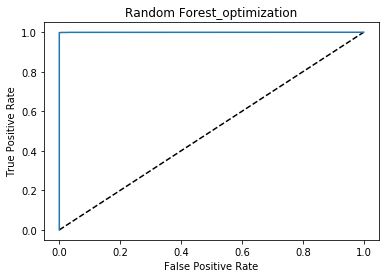

In [292]:
roc_plot(y_test_s, y_pred_prob, 'Random Forest_optimization')
plt.savefig('Random Forest_optimization.png')

In [296]:
def feature_importance(model, X_train):
    # get importances of each feature
    importances = model.feature_importances_
    # get feature name of each column
    feat_labels = X_train.columns
    # arrange the order of importances from larget to small and extract its index
    indices = np.argsort(importances)[::-1]
    plt.style.use('ggplot')
    plt.bar(range(20), importances[indices[:20]])
    plt.xticks(range(20), feat_labels[indices[:20]], rotation=90, fontsize=20)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature importance')

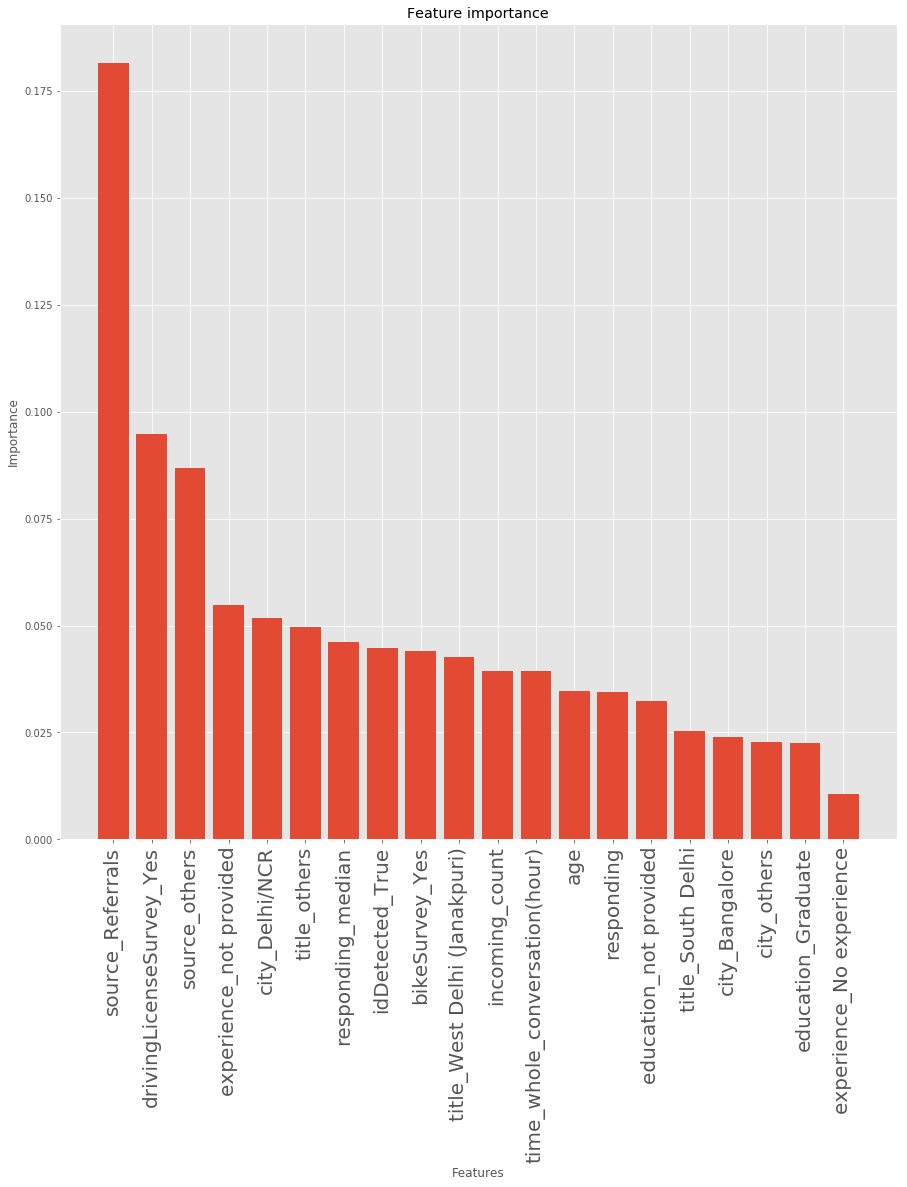

In [299]:
# plt.figure(figsize=(15,15))
feature_importance(xgbrt, X)
plt.savefig('RF_feature importance.png')


In [316]:
plt.style.use('default')